In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./sales_data_sample.csv',encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [16]:
myd = df[['PRODUCTLINE','SALES']]
myd.head()

,PRODUCTLINE,SALES
0,Motorcycles,2871.00
1,Motorcycles,2765.90
2,Motorcycles,3884.34
3,Motorcycles,3746.70
4,Motorcycles,5205.27


In [17]:
lbl_enco =LabelEncoder()
myd['PRODUCTLINE'] = lbl_enco.fit_transform(myd['PRODUCTLINE'])
myd.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_29480\3110550733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myd['PRODUCTLINE'] = lbl_enco.fit_transform(myd['PRODUCTLINE'])


,PRODUCTLINE,SALES
0,1,2871.00
1,1,2765.90
2,1,3884.34
3,1,3746.70
4,1,5205.27


In [ ]:
std_scaler =StandardScaler()
scaled_values = std_scaler.fit_transform(myd)
scaled_values

array([[-0.62833083, -0.37082523],
       [-0.62833083, -0.42789707],
       [-0.62833083,  0.17944282],
       ...,
       [ 0.20111875,  1.01202368],
       [ 0.20111875, -0.78072155],
       [ 0.20111875, -0.25763729]], shape=(2823, 2))

In [ ]:
wcss = []
for i in range(1,20):
    model = KMeans(n_clusters=i,init='k-means++')
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

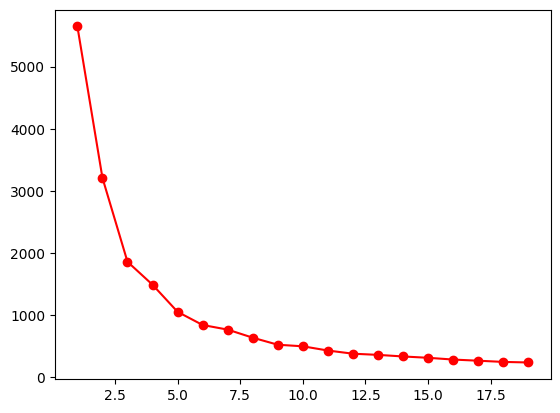

In [26]:
plt.plot(range(1, 20), wcss, 'ro-')
plt.show()

In [27]:
model = KMeans(n_clusters=7,init='k-means++')
clusters = model.fit_predict(scaled_values)
clusters

array([5, 5, 1, ..., 0, 6, 6], shape=(2823,), dtype=int32)

In [28]:
myd['cluster'] = clusters
myd.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_29480\1015821872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myd['cluster'] = clusters


,PRODUCTLINE,SALES,cluster
0,1,2871.00,5
1,1,2765.90,5
2,1,3884.34,1
3,1,3746.70,1
4,1,5205.27,4


In [30]:
model.inertia_

719.2675382925271